<a href="https://colab.research.google.com/github/kjedrzejczak/Wprowadzenie_do_sieci_neuronowych-Tensorflow_2.0-Keras/blob/main/18_Zapis_odczyt_zapisanego_modelu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

sns.set()

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
train_images.shape

(60000, 28, 28)

(-0.5, 27.5, 27.5, -0.5)

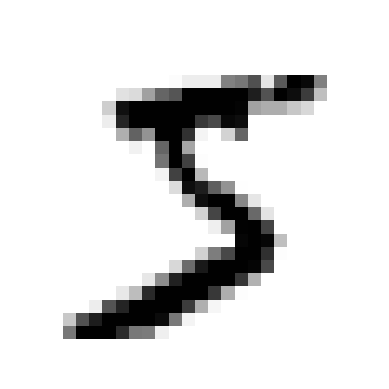

In [ ]:
plt.imshow(train_images[0], cmap='gray_r')
plt.grid(False)
plt.axis(False)

In [ ]:
train_labels[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [ ]:
train_images = train_images[:1000].reshape(-1, 28 * 28) / 255.   # Reczne wypłaszczenie
test_images = test_images[:1000].reshape(-1, 28 * 28) / 255.

train_labels = train_labels[:1000]
test_labels = test_labels[:1000]


# Model

In [ ]:
def create_model():
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(784,)))  # brak flaten poniewarz ręczne wypłaszczenie
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Zapisywanie

In [ ]:
checkpoint_path = 'training/cp.ckpt'
checkpoint_dir = os.path.dirname(checkpoint_path)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

cp_callback = ModelCheckpoint(filepath=checkpoint_path,
                              save_weights_only=True,
                              verbose=1)

model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels), callbacks=[cp_callback])

Epoch 1/10
31/32 [============================>.] - ETA: 0s - loss: 1.1378 - accuracy: 0.6683
Epoch 1: saving model to training/cp.ckpt
32/32 [==============================] - 4s 66ms/step - loss: 1.1330 - accuracy: 0.6690 - val_loss: 0.7369 - val_accuracy: 0.7530
Epoch 2/10
31/32 [============================>.] - ETA: 0s - loss: 0.4311 - accuracy: 0.8750
Epoch 2: saving model to training/cp.ckpt
32/32 [==============================] - 1s 26ms/step - loss: 0.4361 - accuracy: 0.8750 - val_loss: 0.5382 - val_accuracy: 0.8310
Epoch 3/10
32/32 [==============================] - ETA: 0s - loss: 0.2814 - accuracy: 0.9260
Epoch 3: saving model to training/cp.ckpt
32/32 [==============================] - 1s 28ms/step - loss: 0.2814 - accuracy: 0.9260 - val_loss: 0.4782 - val_accuracy: 0.8500
Epoch 4/10
28/32 [=========================>....] - ETA: 0s - loss: 0.1928 - accuracy: 0.9554
Epoch 4: saving model to training/cp.ckpt
32/32 [==============================] - 1s 21ms/step - loss: 0.20

In [ ]:
ls -l {checkpoint_dir}

total 4780
-rw-r--r-- 1 root root      71 Jun 24 15:26 checkpoint
-rw-r--r-- 1 root root 4886436 Jun 24 15:26 cp.ckpt.data-00000-of-00001
-rw-r--r-- 1 root root     978 Jun 24 15:26 cp.ckpt.index


Odczyt - ładowanie modelu

In [ ]:
model = create_model()

loss, acc = model.evaluate(test_images, test_labels, verbose=2)
print(acc)

32/32 - 0s - loss: 2.3811 - accuracy: 0.0630 - 310ms/epoch - 10ms/step
0.06300000101327896


In [ ]:

model.load_weights(checkpoint_path)

loss, acc = model.evaluate(test_images, test_labels, verbose=2)
print(acc)

32/32 - 0s - loss: 0.4163 - accuracy: 0.8660 - 79ms/epoch - 2ms/step
0.8659999966621399


# Dodatkowe opcje

In [ ]:
!rm -rf ./training

In [ ]:
checkpoint_path = 'training/cp-{epoch:04d}.ckpt'
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = ModelCheckpoint(filepath=checkpoint_path,
                              save_weights_only=True,
                              period=5,
                              verbose=1)

model = create_model()
model.save_weights(checkpoint_path.format(epoch=0))

model.fit(train_images, train_labels, epochs=50, validation_data=(test_images, test_labels), callbacks=[cp_callback], verbose=0)


Epoch 5: saving model to training/cp-0005.ckpt

Epoch 10: saving model to training/cp-0010.ckpt

Epoch 15: saving model to training/cp-0015.ckpt

Epoch 20: saving model to training/cp-0020.ckpt

Epoch 25: saving model to training/cp-0025.ckpt

Epoch 30: saving model to training/cp-0030.ckpt

Epoch 35: saving model to training/cp-0035.ckpt

Epoch 40: saving model to training/cp-0040.ckpt

Epoch 45: saving model to training/cp-0045.ckpt

Epoch 50: saving model to training/cp-0050.ckpt


In [ ]:
!ls -l ./training

total 49360
-rw-r--r-- 1 root root      81 Jun 24 15:26 checkpoint
-rw-r--r-- 1 root root 1629023 Jun 24 15:26 cp-0000.ckpt.data-00000-of-00001
-rw-r--r-- 1 root root     526 Jun 24 15:26 cp-0000.ckpt.index
-rw-r--r-- 1 root root 4886448 Jun 24 15:26 cp-0005.ckpt.data-00000-of-00001
-rw-r--r-- 1 root root     978 Jun 24 15:26 cp-0005.ckpt.index
-rw-r--r-- 1 root root 4886448 Jun 24 15:26 cp-0010.ckpt.data-00000-of-00001
-rw-r--r-- 1 root root     978 Jun 24 15:26 cp-0010.ckpt.index
-rw-r--r-- 1 root root 4886448 Jun 24 15:26 cp-0015.ckpt.data-00000-of-00001
-rw-r--r-- 1 root root     978 Jun 24 15:26 cp-0015.ckpt.index
-rw-r--r-- 1 root root 4886448 Jun 24 15:26 cp-0020.ckpt.data-00000-of-00001
-rw-r--r-- 1 root root     978 Jun 24 15:26 cp-0020.ckpt.index
-rw-r--r-- 1 root root 4886448 Jun 24 15:26 cp-0025.ckpt.data-00000-of-00001
-rw-r--r-- 1 root root     978 Jun 24 15:26 cp-0025.ckpt.index
-rw-r--r-- 1 root root 4886448 Jun 24 15:26 cp-0030.ckpt.data-00000-of-00001
-rw-r--r-- 1 roo

In [ ]:
import tensorflow as tf

latest = tf.train.latest_checkpoint(checkpoint_dir)
latest

'training/cp-0050.ckpt'

In [ ]:
model = create_model()
model.load_weights(latest)

loss, acc = model.evaluate(test_images, test_labels, verbose=2)
print(acc)

32/32 - 0s - loss: 0.4932 - accuracy: 0.8720 - 278ms/epoch - 9ms/step
0.871999979019165


# Ręczny zapis wag

In [ ]:
model.save_weights('./checkpoints/my_checkpoint')

model = create_model()

model.load_weights('./checkpoints/my_checkpoint')

loss, acc = model.evaluate(test_images, test_labels, verbose=2)
print(acc)

32/32 - 0s - loss: 0.4932 - accuracy: 0.8720 - 406ms/epoch - 13ms/step
0.871999979019165


In [ ]:
!ls -l checkpoints/

total 1600
-rw-r--r-- 1 root root      83 Jun 24 15:26 checkpoint
-rw-r--r-- 1 root root 1629047 Jun 24 15:26 my_checkpoint.data-00000-of-00001
-rw-r--r-- 1 root root     526 Jun 24 15:26 my_checkpoint.index


# Zapisywanie całego modelu  👈👈👈👈👈👈👈👈👈👈

*   Element listy
*   Element listy



In [ ]:
model = create_model()
model.fit(train_images, train_labels, epochs=5)
model.save('my_model.h5')  # 👈👈👈👈👈👈

Epoch 1/5
32/32 [==============================] - 1s 10ms/step - loss: 1.1436 - accuracy: 0.6790
Epoch 2/5
32/32 [==============================] - 0s 11ms/step - loss: 0.4070 - accuracy: 0.8870
Epoch 3/5
32/32 [==============================] - 0s 10ms/step - loss: 0.2908 - accuracy: 0.9130
Epoch 4/5
32/32 [==============================] - 0s 12ms/step - loss: 0.2005 - accuracy: 0.9560
Epoch 5/5
32/32 [==============================] - 0s 8ms/step - loss: 0.1464 - accuracy: 0.9630


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model

new_model = load_model('my_model.h5') # 👈👈👈👈👈👈
new_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 512)               401920    
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_11 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
loss, acc = new_model.evaluate(test_images, test_labels, verbose=2)
print(acc)

32/32 - 0s - loss: 0.4117 - accuracy: 0.8630 - 199ms/epoch - 6ms/step
0.8629999756813049
